# Using `odcr` in R to work with Sentinel-2 data in the Open Data Cube

This notebook quickly demonstrates how to use the `odcr` R package to interact with the *Open Data Cube*. To fully reproduce the contents of this notebook, you may want to use the *eo2cube* [`odcbox`](https://github.com/eo2cube/odcbox) docker container, installing an *Open Data Cube* instance that serves a Jupyter notebook environment with both a Python kernel and an R kernel. Make sure to follow the instructions to initilaize the Open Data Cube instance so that the Sentinel-2 example data used in this notebook are installed as well. If you are using a different setup, just adapt the notebook to connect to your own database (see section [Connect to a database](#connect_db)) and query your own, indexed data (see section [Query a datacube](#query_cube)).



## Configuration

Install and load the `odcr` package. Use the function `config` to make sure that the Python installation on your host and the `datacube` core has been found. You may point `odcr` towards a different Python binary/environment in case you have multiple installed using the argument `python`.

In [ ]:
devtools::install_github("eo2cube/odcr")
library(odcr)

In [2]:
odcr::config()

'odcr' is using the following python configuration:

python:         /env/bin/python3
libpython:      /usr/lib/python3.6/config-3.6m-x86_64-linux-gnu/libpython3.6.so
pythonhome:     //env://env
version:        3.6.9 (default, Oct  8 2020, 12:12:24)  [GCC 8.4.0]
numpy:          /env/lib/python3.6/site-packages/numpy
numpy_version:  1.19.5
datacube:       /env/lib/python3.6/site-packages/datacube

python versions found: 
 /env/bin/python3
 /usr/bin/python3

Python library 'datacube' is available, 'odcr' configuration successfull.


## <a name="connect_db"></a>Connect to a database

You now may to connect your session to your database to gain access to your Open Data Cube instance.

In [3]:
database_connect(app = "Sentinel_2")

## List measurements and products

Using the `dc*` functions, you can retrieve meta data about what is stored in your *Open Data Cube* instance:

In [4]:
dc_list_measurements()

name,dtype,units,nodata,aliases,flags_definition
<chr>,<chr>,<chr>,<dbl>,<list>,<list>
B01,uint16,1,0,"band_01 , coastal_aerosol",NaN
B02,uint16,1,0,"band_02, blue",NaN
B03,uint16,1,0,"band_03, green",NaN
B04,uint16,1,0,"band_04, red",NaN
B05,uint16,1,0,"band_05 , red_edge_1",NaN
B06,uint16,1,0,"band_06 , red_edge_2",NaN
B07,uint16,1,0,"band_07 , red_edge_3",NaN
B08,uint16,1,0,"band_08, nir , nir_1",NaN
B8A,uint16,1,0,"band_8a , nir_narrow, nir_2",NaN


In [5]:
dc_list_products()

,name,description,lat,format,region_code,instrument,lon,platform,label,dataset_maturity,time,product_family,creation_time,crs,resolution,tile_size,spatial_dimensions
,<chr>,<chr>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>
1,s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NaN,NaN,NaN,NaN


## <a name="query_cube"></a>Query a datacube

A query is written as a named `list` object, of which each element represents an allowed query parameter. Here, we define a lat/lon range, a time range, the desired output crs and the desired output resolution:

In [6]:
# Create a query object
lat <- 22.821
lon <- 28.518
buffer <- 0.05

query <- list(
    'time' = c('2020-01', '2020-03'),
    'x' = c(lon - buffer, lon + buffer),
    'y' = c(lat + buffer, lat - buffer),
    'output_crs' = 'epsg:6933',
    'resolution' = c(-20,20)
)

With `dc_find_datasets`, you can retrieve all datasets associated with your query:

In [7]:
dc_find_datasets(query = c(product = "s2_l2a", query))

AOT,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,SCL,WVP,visual,overview
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/AOT.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B01.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B02.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B03.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B04.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B05.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B06.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B07.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B08.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B09.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B11.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B12.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/B8A.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/SCL.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/WVP.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/TCI.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/3/S2B_35QPF_20200307_0_L2A/L2A_PVI.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/AOT.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B01.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B02.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B03.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B04.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B05.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B06.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B07.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B08.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B09.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B11.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B12.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/B8A.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/SCL.tif,https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/Q/PF/2020/1/S2A_35QPF_20200102_0_L2A/WVP.tif,https://sentinel-cogs.s3.us-west-2.amazona

Use `dc_load` to load all data associated with your query:

In [8]:
ds <- dc_load(query = c(product = "s2_l2a", query))
ds

<xarray.Dataset>
Dimensions:      (time: 19, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    B01          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B02          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B03          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B04          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B05          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B06          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B07          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    B08          (time, y

Alternatively, you may want to add a query element to only query and load specific measurements, e.g. "red" and "nir":

In [9]:
bands <- list(measurements = c('red', 'nir')) #c('blue', 'green', 'red', 'nir', 'swir_1'))
ds <- dc_load(query = c(product = "s2_l2a", query, bands))
ds

<xarray.Dataset>
Dimensions:      (time: 19, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

## Index/subset data

By default, data are loaded as an object of class `xarray`, which is natively supported by `odcr`. The package implements both an `xarray`-equivalent native class as well as standard methods to interact with an `xarray`, as you will see in the following examples. First, let's make use of the `dim` method to display the dimensions of the loaded data:

In [10]:
dim(ds)

time    x    y 
  19  483  590

For indexing/subsetting data by measurements, you can use the `[[` extraction method. Here, we extract the second measurment by its index, which is referring to the "nir" band:

In [11]:
ds[[2]]

<xarray.DataArray 'nir' (time: 19, y: 590, x: 483)>
dask.array<dc_load_nir, shape=(19, 590, 483), dtype=uint16, chunksize=(1, 590, 483), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:6933
    grid_mapping:  spatial_ref

Alternatively, you can index measurements using their names or aliases, as shown here:

In [12]:
ds[["nir"]]

<xarray.DataArray 'nir' (time: 19, y: 590, x: 483)>
dask.array<dc_load_nir, shape=(19, 590, 483), dtype=uint16, chunksize=(1, 590, 483), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [13]:
ds$nir

<xarray.DataArray 'nir' (time: 19, y: 590, x: 483)>
dask.array<dc_load_nir, shape=(19, 590, 483), dtype=uint16, chunksize=(1, 590, 483), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:6933
    grid_mapping:  spatial_ref

For indexing/subsetting by dimensions, you can use the extraction method `[`. Its index order corresponds to the order of the dimensions returned by `dim`. This means that in this example, the first index referrs to the temporal dimension and the second and third indices to the spatial dimensions x and y:

In [14]:
dim(ds)
ds[13, 11:20, 21:30]

time    x    y 
  19  483  590

<xarray.Dataset>
Dimensions:      (x: 10, y: 10)
Coordinates:
    time         datetime64[ns] 2020-02-26T08:53:51
  * y            (y) float64 2.842e+06 2.842e+06 ... 2.842e+06 2.842e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.747e+06 2.747e+06
    spatial_ref  int32 6933
Data variables:
    red          (y, x) uint16 dask.array<chunksize=(10, 10), meta=np.ndarray>
    nir          (y, x) uint16 dask.array<chunksize=(10, 10), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

To subset only by one dimension, you may skip those dimensions that should not be subsetted:

In [15]:
ds[13,,]

<xarray.Dataset>
Dimensions:      (x: 483, y: 590)
Coordinates:
    time         datetime64[ns] 2020-02-26T08:53:51
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (y, x) uint16 dask.array<chunksize=(590, 483), meta=np.ndarray>
    nir          (y, x) uint16 dask.array<chunksize=(590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

Here, we subset the red band by two timestamps and smaller spatial extent:

In [16]:
ds$red[1:2,10:19, 110:119]

<xarray.DataArray 'red' (time: 2, y: 10, x: 10)>
dask.array<getitem, shape=(2, 10, 10), dtype=uint16, chunksize=(1, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 2020-01-07T08:53:48
  * y            (y) float64 2.841e+06 2.841e+06 2.841e+06 ... 2.84e+06 2.84e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.747e+06 2.747e+06
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        0
    crs:           epsg:6933
    grid_mapping:  spatial_ref

Using the function `xar_sel_time`, it is possible to index the temporal dimension using a character vector of unique timestamps. Here, for example, we extract to timestamps from our data:

In [17]:
xar_sel_time(ds, c("2020-01-02", "2020-01-07"))

<xarray.Dataset>
Dimensions:      (time: 2, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 2020-01-07T08:53:48
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

By default, the timestamps input must match the timestamps of your data. Invalid times will be skipped throwing a warning:

In [18]:
xar_sel_time(ds, c("2020-01-01", "2020-01-07"))

Warning message:
“Some query times are not matching times of x, subsetting only by valid times.”


<xarray.Dataset>
Dimensions:      (time: 1, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-07T08:53:48
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

However, you can also index by timestamps inputs that are closest to the timestamps of the data. To do so, disable exact matching using `exact_match = F`:

In [19]:
xar_sel_time(ds, c("2020-01-01", "2020-01-07"), exact_match = F)

<xarray.Dataset>
Dimensions:      (time: 2, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 2020-01-07T08:53:48
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(1, 590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

Note that timestamps inputs that both are closest to the same timestamp of the data will result in duplicated timestamps in the result and a warning is thrown:

In [20]:
xar_sel_time(ds, c("2020-01-03", "2020-01-04"), exact_match = F)

Warning message:
“Output contains duplicated times, since some query times are closest to the same times of x.”


<xarray.Dataset>
Dimensions:      (time: 2, x: 483, y: 590)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 2020-01-02T08:53:48
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 dask.array<chunksize=(2, 590, 483), meta=np.ndarray>
    nir          (time, y, x) uint16 dask.array<chunksize=(2, 590, 483), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

## Plotting

`odcr` implements a simple plotting interface using `stars`. Here, we index `ds` by the first timestamp, subset its spatial dimensions and extract the first measurement (the red band). Afterwards, we plot it using the `odcr` plot method for the `xarray` class:

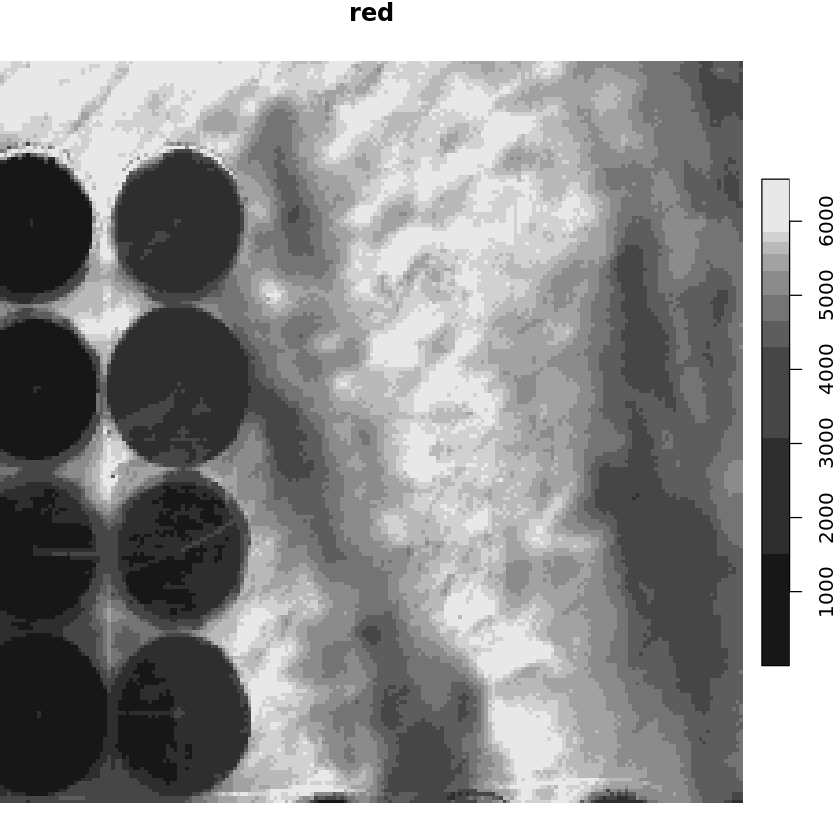

In [21]:
plot(ds[1,100:300,100:300][[1]])

## Arithmetic

`odcr` supports basic arithmetic operations on `xarray`s. For example, you can apply a formula to all cells of your data using a syntax like in the following example. Here, we calculate the NDVI by substracting the "red" band from the "nir" band, adding the "nir" band and the "red" band and dividing both results:

In [22]:
ndvi <- (ds[["nir"]] - ds[["red"]]) / (ds[["nir"]] + ds[["red"]])
ndvi

<xarray.DataArray (time: 19, y: 590, x: 483)>
dask.array<true_divide, shape=(19, 590, 483), dtype=float64, chunksize=(1, 590, 483), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2020-01-02T08:53:48 ... 2020-03-27T08:...
  * y            (y) float64 2.843e+06 2.843e+06 ... 2.831e+06 2.831e+06
  * x            (x) float64 2.747e+06 2.747e+06 ... 2.756e+06 2.756e+06
    spatial_ref  int32 6933

The result is an `xarray` with the same dimensions as the original data. We can plot the result, e.g. for the first timestamp using `plot`:

downsample set to c(1,1)


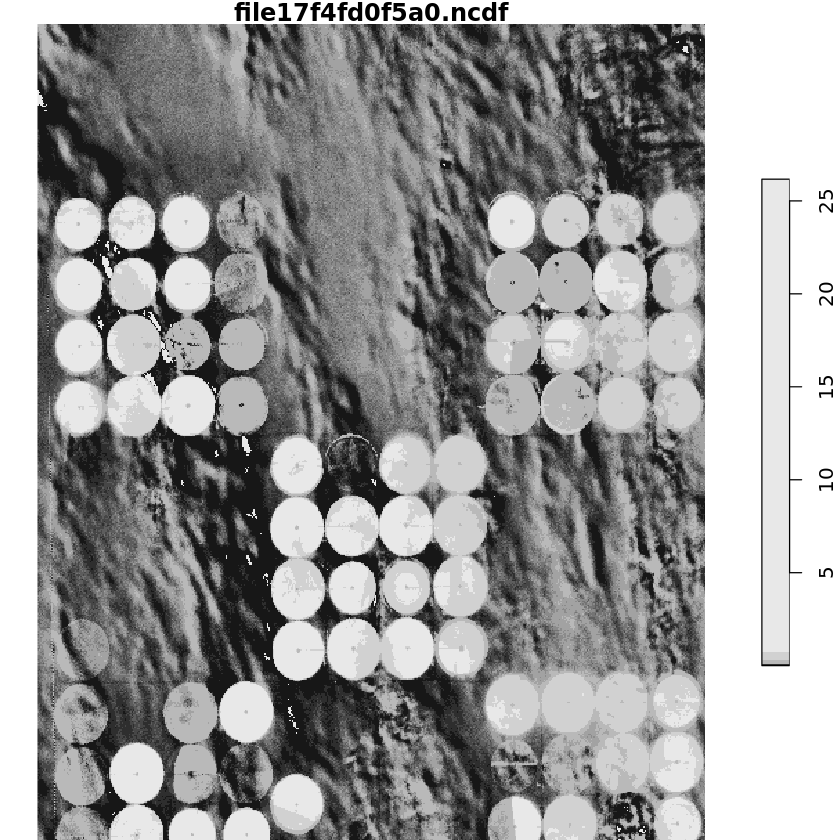

In [23]:
plot(ndvi[1,])

## Coercing to native spatial classes

`odcr` implements methods to coerce `xarray` objects into native spatial classes such as `stars` or `Raster*`. To coerce an `xarray` object into a `stars` object, use `as.stars`:

In [24]:
ds_stars <- as.stars(ds[1:3,100:199, 100:199]) # or:
#ds_stars <- as(ds[1:3,100:199, 100:199], "stars")
ds_stars

stars object with 3 dimensions and 2 attributes
attribute(s):
        Min. 1st Qu. Median     Mean 3rd Qu. Max.
X..nir  1560    4800   5908 5376.095    6212 7836
X..red     1    2598   4970 3930.067    5316 6504
dimension(s):
     from  to offset delta                       refsys point values x/y
x       1 100      0     1 WGS 84 / NSIDC EASE-Grid ...    NA   NULL [x]
y       1 100    100    -1 WGS 84 / NSIDC EASE-Grid ...    NA   NULL [y]
time    1   3     NA    NA                           NA    NA   NULL    

In [25]:
ndvi_stars <- as.stars(ndvi)
ndvi_stars

stars object with 3 dimensions and 1 attribute
attribute(s), summary of first 1e+05 cells:
                      Min.    1st Qu.     Median      Mean    3rd Qu.     Max.
file17f52d292b7.ncdf     0 0.06856548 0.07989854 0.1686233 0.09137056 12.83542
dimension(s):
     from  to offset delta                       refsys point values x/y
x       1 483      0     1 WGS 84 / NSIDC EASE-Grid ...    NA   NULL [x]
y       1 590    590    -1 WGS 84 / NSIDC EASE-Grid ...    NA   NULL [y]
time    1  19     NA    NA                           NA    NA   NULL    

Coercing to `Raster*` works the same way. Note that `raster` cannot represent objects with more than 3 dimensions. Coercing four-dimensional `xarray`s into `raster` will thus result in a list of `RasterBricks`.

In [26]:
ds_raster <- as.raster(ds[1:3,100:199, 100:199])
ds_raster

Warning message:
“Raster* cannot represent four dimensions, only three. Coercing to a list of Raster* instead.”


$X..nir
class      : RasterBrick 
dimensions : 100, 100, 10000, 3  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 100, 0, 100  (xmin, xmax, ymin, ymax)
crs        : +proj=cea +lat_ts=30 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : layer.1, layer.2, layer.3 
min values :    1908,    1560,    1944 
max values :    7836,    6792,    6812 
time       : 1, 2, 3 


$X..red
class      : RasterBrick 
dimensions : 100, 100, 10000, 3  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 100, 0, 100  (xmin, xmax, ymin, ymax)
crs        : +proj=cea +lat_ts=30 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : layer.1, layer.2, layer.3 
min values :       1,       1,     400 
max values :    6504,    5660,    5672 
time       : 1, 2, 3 



In [27]:
ds_ndvi <- as.raster(ndvi)
ds_ndvi

class      : RasterBrick 
dimensions : 590, 483, 284970, 19  (nrow, ncol, ncell, nlayers)
resolution : 1, 1  (x, y)
extent     : 0, 483, 0, 590  (xmin, xmax, ymin, ymax)
crs        : +proj=cea +lat_ts=30 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :      layer.1,      layer.2,      layer.3,      layer.4,      layer.5,      layer.6,      layer.7,      layer.8,      layer.9,     layer.10,     layer.11,     layer.12,     layer.13,     layer.14,     layer.15, ... 
min values : 0.0000000000, 0.0086058520, 0.0043975374, 0.0000000000, 0.0000000000, 0.0007936508, 0.0075885329, 0.0085470085, 0.0163934426, 0.0000000000, 0.0019755038, 0.0004014452, 0.0093043864, 0.0052539405, 0.0044516390, ... 
max values :   26.1693291,    7.8564547,    7.4154195,   77.3010753,    8.1431421,    8.6615466,    7.7234043,    7.5000000,    7.7845567,    8.4730849,    7.7010163,    7.6560300,    7.9392319,    7.7875030,    7.7730412, ... 
time       : 1, 19 (min, max)
